In [193]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [194]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# Modulo de optimización de scipy
from scipy import optimize

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [195]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [196]:
#Carga de dataset
data = pd.read_csv('/content/drive/MyDrive/UMRPSFXCH/2023_2/SIS-420/Datasets/dataR2.csv', delimiter=",")#, skiprows=1)

# Importar libreria para dividir entrenamiento y prueba
from sklearn.model_selection import train_test_split

In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [198]:
#no se necesita llenar datos vacios

# #llenar datos vacios con le promedio
# columnas_especificas = ['Arrival Delay in Minutes']
# media_columnas = data[columnas_especificas].mean()
# data[columnas_especificas] = data[columnas_especificas].fillna(media_columnas)

In [199]:
#no se necesita cambiar variables categoricas

# #variables categoricas
# columnas_categoricas = data.select_dtypes(include=['object']).columns
# #variables fechas
# columnas_fechas = data.select_dtypes(include=['datetime64']).columns

In [200]:
#no se necesita

# #Procesamiento de frases o palabras
# for columna in columnas_categoricas:
#   le = LabelEncoder()
#   data[columna] = le.fit_transform(data[columna])

In [201]:
#data.info()

In [202]:
#no se necesita

# #Elimino columna irrelevante
# data = data.drop(columns=['id'])

In [203]:
#data.info()

In [204]:
# Division de dataset en entrenamiento y prueba
# test_size es el porcentaje que se dividira el dataset en este caso 10%
# random_state=42 es un estandar para que se repita los valores siempre que se utilice
train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)

In [205]:
# informacion de los nuevos datasets
train_data.info()
test_data.info()

#exportar nuevos datasets
train_data.to_csv("train.csv", index=False)
test_data.to_csv("test.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 94 to 102
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             104 non-null    int64  
 1   BMI             104 non-null    float64
 2   Glucose         104 non-null    int64  
 3   Insulin         104 non-null    float64
 4   HOMA            104 non-null    float64
 5   Leptin          104 non-null    float64
 6   Adiponectin     104 non-null    float64
 7   Resistin        104 non-null    float64
 8   MCP.1           104 non-null    float64
 9   Classification  104 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 8.9 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 83 to 26
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             12 non-null     int64  
 1   BMI             12 non-null     float64
 2   Glucose        

In [206]:
#Carga de dataset
data = pd.read_csv('train.csv', delimiter=',')#, skiprows=1)

# Cambia los valores 1 por 0 y los valores 2 por 1 en la columna "Classification"
data["Classification"] = data["Classification"].replace({1: 0, 2: 1})

In [207]:
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,60,31.231410,131,30.130,9.736007,37.8430,8.404430,11.50005,396.021,1
1,45,20.829995,74,4.560,0.832352,7.7529,8.237405,28.03230,382.955,1
2,64,34.529723,95,4.427,1.037394,21.2117,5.462620,6.70188,252.449,0
3,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,0
4,42,21.359915,93,2.999,0.687971,19.0826,8.462915,17.37615,321.919,1


In [208]:
# Lectura de Datos
#leemos x a partir de la la segunda columna
X = data.iloc[:, :9]
#y se encuentra en la primer columna
y = data.iloc[:, 9]
m = y.size

print(X)
print('*'*25)
print(y)

     Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
0     60  31.231410      131   30.130  9.736007  37.8430     8.404430   
1     45  20.829995       74    4.560  0.832352   7.7529     8.237405   
2     64  34.529723       95    4.427  1.037394  21.2117     5.462620   
3     48  23.500000       70    2.707  0.467409   8.8071     9.702400   
4     42  21.359915       93    2.999  0.687971  19.0826     8.462915   
..   ...        ...      ...      ...       ...      ...          ...   
99    45  29.384757       90    4.713  1.046286  23.8479     6.644245   
100   38  23.340000       75    5.782  1.069670  15.2600    17.950000   
101   52  30.801249       87   30.212  6.483495  29.2739     6.268540   
102   77  25.900000       85    4.580  0.960273  13.7400     9.753260   
103   65  30.915577       97   10.491  2.510147  44.0217     3.710090   

     Resistin    MCP.1  
0    11.50005  396.021  
1    28.03230  382.955  
2     6.70188  252.449  
3     7.99585  417.114 

In [209]:
#definiendo la funcion para realizar una normalizacion de los datos
def featureNormalize(X):
    # Hace una copia de los datos de entrada
    X_norm = X.copy()

    # Inicializa vectores mu y sigma con ceros
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # Calcula la media y la desviación estándar de cada característica
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)

    # Realiza la normalización de características
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [210]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

     Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
0     60  31.231410      131   30.130  9.736007  37.8430     8.404430   
1     45  20.829995       74    4.560  0.832352   7.7529     8.237405   
2     64  34.529723       95    4.427  1.037394  21.2117     5.462620   
3     48  23.500000       70    2.707  0.467409   8.8071     9.702400   
4     42  21.359915       93    2.999  0.687971  19.0826     8.462915   
..   ...        ...      ...      ...       ...      ...          ...   
99    45  29.384757       90    4.713  1.046286  23.8479     6.644245   
100   38  23.340000       75    5.782  1.069670  15.2600    17.950000   
101   52  30.801249       87   30.212  6.483495  29.2739     6.268540   
102   77  25.900000       85    4.580  0.960273  13.7400     9.753260   
103   65  30.915577       97   10.491  2.510147  44.0217     3.710090   

     Resistin    MCP.1  
0    11.50005  396.021  
1    28.03230  382.955  
2     6.70188  252.449  
3     7.99585  417.114 

In [213]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # Convierte la entrada a un arreglo numpy
    z = np.array(z)

    # Limita los valores de z para evitar overflow
    z = np.clip(z, -500, 500)

    g = 1 / (1 + np.exp(-z))

    return g


In [214]:
# Prueba la implementacion de la funcion sigmoid
z = 0
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 0 ) =  0.5


In [215]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X], axis=1)

print(X[5])

[1.0000000e+00 6.5000000e+01 2.9666548e+01 8.5000000e+01 1.4649000e+01
 3.0714070e+00 2.6516600e+01 7.2828700e+00 1.9463240e+01 1.6984400e+03]


In [218]:
#definicion del calculo del costo mediante la sigmoide

def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento
    #epsilon = 1e-8

    J = 0
    h = sigmoid(X.dot(theta.T))

    epsilon = 1e-10  # Un valor pequeño para evitar divisiones por cero
    J = (1 / m) * np.sum(-y.dot(np.log(h + epsilon)) - (1 - y).dot(np.log(1 - h + epsilon)))

    # J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J


In [219]:
#definicion del desenso por el gradiente

def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # número de ejemplos de entrenamiento

    # Realiza una copia de theta, que será actualizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []  # Lista para almacenar el historial de valores de la función de costo

    for i in range(num_iters):
        # Calcula la hipótesis utilizando la función sigmoide
        h = sigmoid(X.dot(theta.T))

        # Actualiza los parámetros theta utilizando el descenso por el gradiente
        theta = theta - (alpha / m) * (h - y).dot(X)

        # Calcula el valor de la función de costo actual y lo agrega al historial
        J_history.append(calcularCosto(theta, X, y))

    return theta, J_history


In [220]:
#Carga de dataset
data_test = pd.read_csv('test.csv')
#print(data)

In [221]:
# Selecciona el índice de la fila deseada
fila_deseada = 10

# Verifica si el índice de la fila deseada está dentro del rango válido
if fila_deseada < len(data_test):
    # Selecciona la fila completa en forma de arreglo NumPy
    fila_completa = data.iloc[fila_deseada].to_numpy()
    # Imprime la fila completa
    print(fila_completa)
else:
    # Si el índice está fuera del rango, muestra un mensaje de error
    print("La fila no existe")


[ 64.          22.22222222  98.           5.7          1.37788
  12.1905       4.783985    13.91245    395.976        1.        ]


theta calculado por el descenso por el gradiente: [-0.00084653 -0.02360528 -0.03578256  0.02944679  0.02578332  0.0096848
 -0.01836456 -0.01126799  0.02196799 -0.00014157]
(usando el descenso por el gradiente):0.6706512873321202
Existe mucha probabilidad de cancer


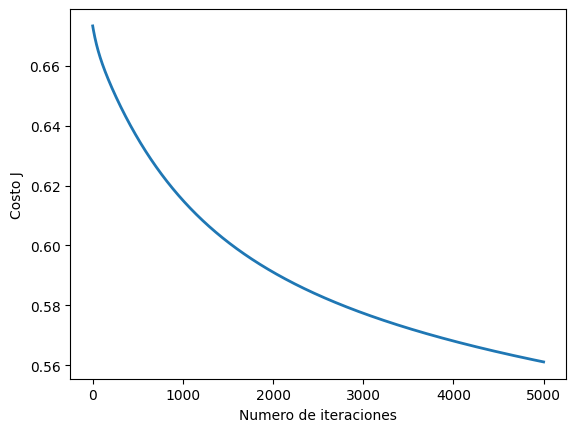

In [222]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.00001
num_iters = 5000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(10)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar si ingresa o no a la universidad
X_array = [1, 64, 22.22222222, 98, 5.7, 1.37788, 12.1905, 4.783985, 13.91245, 395.976]

aprueba = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print(f"(usando el descenso por el gradiente):{aprueba}")

if aprueba > 0.5: print('Existe mucha probabilidad de cancer')
else: print('Las probabilidad de cancer es baja')